In [1]:
import pandas as pd
data = pd.read_csv("/kaggle/input/petfinder-pawpularity-score/train.csv", sep=',')
data

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [2]:
data['Id'] = data['Id'] + '.jpg'
data = data.rename(columns={'Id': 'filename'})
data

,filename,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2.jpg,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,0,1,1,1,0,0,0,0,1,0,0,0,20


Je découpe en train / val / test

In [3]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size=0.2, random_state=1)  # val 20%
train, test = train_test_split(train, test_size=0.01, random_state=1)  # test 1%
print("shape train: ", train.shape)
print("shape val: ", val.shape)
print("shape test: ", test.shape)

shape train:  (7849, 14)
shape val:  (1983, 14)
shape test:  (80, 14)


In [4]:
dataset_dir = '/kaggle/input/petfinder-pawpularity-score/train'
width, height = 512, 512
batch_size = 32

Par curiosité, je regarde les dimensions des images du dataset

In [5]:
import os
from PIL import Image
import numpy as np
widths, heights = [], []
for image_name in os.listdir(dataset_dir):
    image_path = os.path.join(dataset_dir, image_name)
    img = Image.open(image_path)
    img_width, img_height = img.size
    widths.append(img_width)
    heights.append(img_height)
print("max width:", max(widths), "\nmax height:", max(heights),
      "\nmin width:", min(widths), "\nmin height:", min(heights),
      "\nmean width:", np.array(widths).mean(),
      "\nmean height:", np.array(heights).mean())

max width: 1280 
max height: 1280 
min width: 90 
min height: 113 
mean width: 804.4262510088781 
mean height: 904.2843018563358


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.75, 1),
    shear_range=0.1,
    zoom_range=[0.75, 1],
    horizontal_flip=True,
    validation_split=0.2
)
validation_generator = ImageDataGenerator(
    rescale=1.0 / 255
)
test_generator = ImageDataGenerator(
    rescale=1.0 / 255
)

Found 2 validated image filenames.


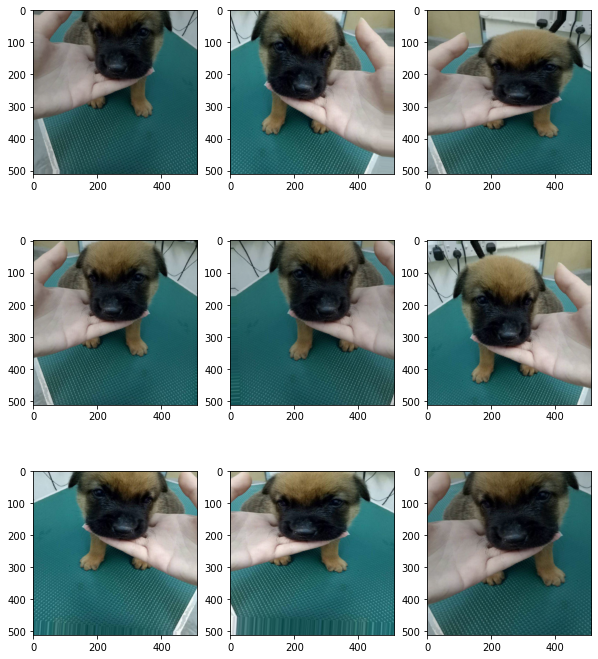

In [7]:
import matplotlib.pyplot as plt

series = data.iloc[2]
data_augmentation_viz = pd.concat([series, series], axis=1).transpose()
iterator_visualizations = train_generator.flow_from_dataframe(
    dataframe=data_augmentation_viz,
    directory=dataset_dir,
    x_col="filename",
    y_col="Pawpularity",
    class_mode="raw",
    target_size=(width, height),
    batch_size=1,  # 1 seule image pour vérifier
)
plt.figure(figsize=(10, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)  # 3x3 grid
    batch = next(iterator_visualizations)  # toujours la même image
    img = batch[0]
    img = img[0, :, :, :]
    plt.imshow(img)
plt.show()
plt.close()

In [8]:
train_generator = train_generator.flow_from_dataframe(
    dataframe=train,
    directory=dataset_dir,
    x_col="filename",
    y_col="Pawpularity",
    class_mode="raw",  # "raw" pour les regressions
    target_size=(width, height),
    batch_size=batch_size
)
validation_generator = validation_generator.flow_from_dataframe(
    dataframe=val,
    directory=dataset_dir,
    x_col="filename",
    y_col="Pawpularity",
    class_mode="raw",
    target_size=(width, height),
    batch_size=batch_size
)
test_generator = test_generator.flow_from_dataframe(
    dataframe=test,
    directory=dataset_dir,
    x_col="filename",
    y_col="Pawpularity",
    class_mode="raw",
    target_size=(width, height),
    batch_size=batch_size
)

Found 7849 validated image filenames.
Found 1983 validated image filenames.
Found 80 validated image filenames.


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_callback = EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
    min_delta=1,  # sous les 1% de mieux, on patiente
    patience=10,  # on patiente max 10 epochs
    verbose=2,
    mode="min",
    restore_best_weights=True
)
model_checkpoint_callback = ModelCheckpoint(
    'efficientNet_reg.h5',
    monitor="val_mean_absolute_percentage_error",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_freq="epoch"
)
callbacks = [early_stopping_callback, model_checkpoint_callback]

Le notebook doit fonctionner sans accès internet

In [10]:
import sys
import os
sys.path.insert(0, "/kaggle/input/efnetv2src/efficientnet-v2-keras-main")
sys.path.append('../input/tfkeras-efficientnetsv2/')
from efficientnet_v2 import EfficientNetV2XL

In [11]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError
import tensorflow_addons as tfa

efficientnet = EfficientNetV2XL(
    include_top=False,
    weights='../input/tfkeras-efficientnetsv2/21_ft1k_notop/efficientnetv2-xl-21k-ft1k_notop.h5', 
    input_shape=(height, width, 3)
)

for layer in efficientnet.layers:
        layer.trainable = False

x = GlobalAveragePooling2D(name="avg_pool")(efficientnet.output)
x = BatchNormalization()(x)
x = Dropout(0.2, name="top_dropout")(x)
outputs = Dense(1, name="pred")(x)

efficientnet = Model(inputs=efficientnet.inputs, outputs=outputs)

radam = tfa.optimizers.RectifiedAdam(learning_rate=0.001)
optimizer = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)

efficientnet.compile(
    optimizer=optimizer,
    loss="mean_absolute_error",
    metrics=[MeanAbsoluteError(), MeanAbsolutePercentageError()]
)

2021-12-16 13:51:14.244294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 13:51:14.344101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 13:51:14.344810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 13:51:14.345914: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
epochs = 100
batch_size = 8
history_efficientnet = efficientnet.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks,
    workers=6  # guess
)

2021-12-16 13:51:39.651695: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-12-16 13:52:19.863362: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


246/246 [==============================] - 694s 3s/step - loss: 37.3947 - mean_absolute_error: 37.3947 - mean_absolute_percentage_error: 97.7570 - val_loss: 37.0375 - val_mean_absolute_error: 37.0375 - val_mean_absolute_percentage_error: 94.4012


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
246/246 [==============================] - 646s 3s/step - loss: 34.0815 - mean_absolute_error: 34.0815 - mean_absolute_percentage_error: 87.0890 - val_loss: 30.5262 - val_mean_absolute_error: 30.5262 - val_mean_absolute_percentage_error: 75.4472
Epoch 3/100
246/246 [==============================] - 657s 3s/step - loss: 22.7099 - mean_absolute_error: 22.7099 - mean_absolute_percentage_error: 65.0444 - val_loss: 16.5521 - val_mean_absolute_error: 16.5521 - val_mean_absolute_percentage_error: 56.3692
Epoch 4/100
246/246 [==============================] - 657s 3s/step - loss: 15.1494 - mean_absolute_error: 15.1494 - mean_absolute_percentage_error: 65.5222 - val_loss: 14.4109 - val_mean_absolute_error: 14.4109 - val_mean_absolute_percentage_error: 61.6722
Epoch 5/100
246/246 [==============================] - 658s 3s/step - loss: 14.3726 - mean_absolute_error: 14.3726 - mean_absolute_percentage_error: 69.0496 - val_loss: 13.9865 - val_mean_absolute_error: 13.9865 - val_mean_abs

In [13]:
train["Pawpularity"].mean()

37.92024461714868

In [14]:
mean_baseline = MeanAbsolutePercentageError()
mean_baseline = mean_baseline(
    val["Pawpularity"], train["Pawpularity"].mean()
).numpy()

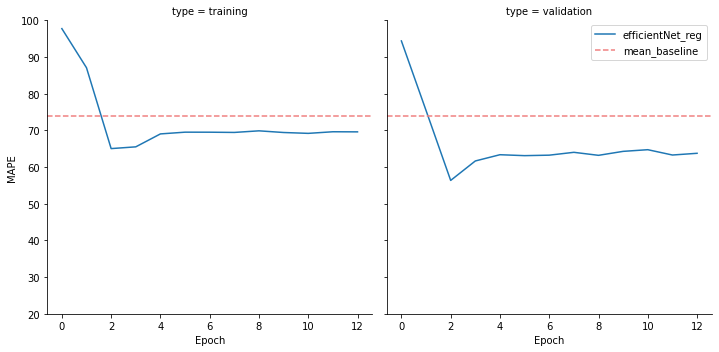

In [15]:
dict1 = {
    "MAPE": history_efficientnet.history["mean_absolute_percentage_error"],
    "type": "training"
}
dict2 = {
    "MAPE": history_efficientnet.history["val_mean_absolute_percentage_error"],
    "type": "validation"
}
s1 = pd.DataFrame(dict1)
s2 = pd.DataFrame(dict2)
df = pd.concat([s1, s2], axis=0).reset_index()
import seaborn as sns
grid = sns.relplot(
    data=df,
    x=df["index"],
    y="MAPE",
    col="type",
    kind="line",
    legend=False
)
grid.set(ylim=(20, 100))
for ax in grid.axes.flat:
    ax.axhline(
        y=mean_baseline, color="lightcoral", linestyle="dashed"
    )
    ax.set(xlabel="Epoch")
plt.legend(labels=["efficientNet_reg", "mean_baseline"])
plt.show()

In [16]:
import tensorflow as tf
def preprocess(image):  
    return (tf.cast(image, dtype=tf.float32) - 128.00) / 128.00

pawpularity= 25 	prediction= 26.55
pawpularity= 55 	prediction= 26.56
pawpularity= 31 	prediction= 26.16
pawpularity= 46 	prediction= 26.29
pawpularity= 29 	prediction= 25.71
pawpularity= 57 	prediction= 26.19
pawpularity= 36 	prediction= 26.75
pawpularity= 26 	prediction= 25.8
pawpularity= 33 	prediction= 26.22
pawpularity= 49 	prediction= 26.33
pawpularity= 28 	prediction= 25.9
pawpularity= 36 	prediction= 27.33


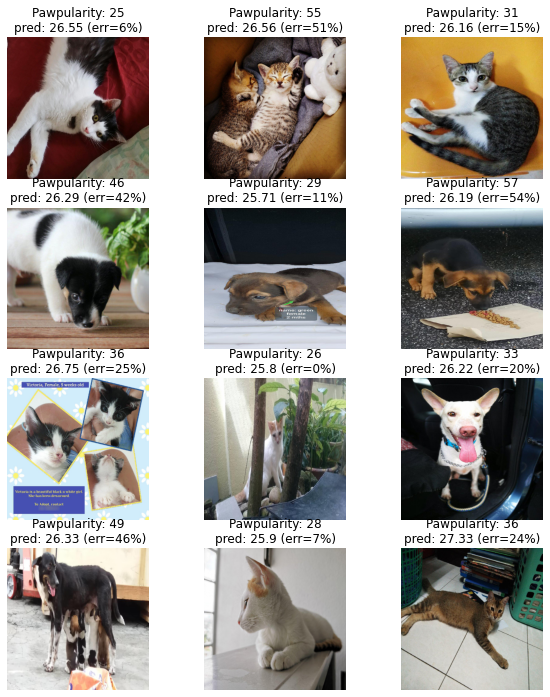

In [17]:
import numpy as np
plt.figure(figsize=(10, 12))
batch = next(test_generator)  # renvoie 32 images
for i in range(12):
    ax = plt.subplot(4, 3, i + 1)  # 4x3 grid
    image = batch[0][i, :, :, :]  # i-ème image
    img = preprocess(image.reshape(1, width, height, 3))
    pawpularity = batch[1][i]  # i-ème pawpularity
    preds = efficientnet.predict(img)
    prediction = preds.flatten()[0]
    print('pawpularity=', pawpularity, '\tprediction=', round(prediction, 2))
    diff = prediction - pawpularity
    percentDiff = (diff / pawpularity) * 100
    absPercentDiff = np.abs(percentDiff)
    plt.title("Pawpularity: " + str(pawpularity) +\
              "\npred: " + str(round(prediction, 2)) +\
              " (err=" + str(int(absPercentDiff)) + "%)")
    plt.imshow(image)
    plt.axis("off")
plt.show()
plt.close()

In [18]:
import os
from PIL import Image
test_dir = '/kaggle/input/petfinder-pawpularity-score/test'
ids = []
pawpularities = []
for test_image in os.listdir(test_dir):
    image_path = os.path.join(test_dir, test_image)
    id_image = test_image.split('.')[0]
    ids.append(id_image)
    img = Image.open(image_path) 
    img = img.resize((width, height))
    img = preprocess(np.array(img).reshape(1, width, height, 3))
    preds = efficientnet.predict(img)
    prediction = preds.flatten()[0]
    pawpularities.append(prediction)

submission_dict = {
    'Id': ids,
    'Pawpularity': pawpularities
}
submission_df = pd.DataFrame(submission_dict)
print(submission_df)
submission_df.to_csv('submission.csv', index=False, sep=',')

                                 Id  Pawpularity
0  c978013571258ed6d4637f6e8cc9d6a3    22.215588
1  4e429cead1848a298432a0acad014c9d    23.023277
2  43a2262d7738e3d420d453815151079e    23.530537
3  8f49844c382931444e68dffbe20228f4    22.584520
4  4128bae22183829d2b5fea10effdb0c3    23.070393
5  80bc3ccafcc51b66303c2c263aa38486    22.616951
6  e0de453c1bffc20c22b072b34b54e50f    24.303555
7  b03f7041962238a7c9d6537e22f9b017    24.063425
